Dataset Preview:
          PS1         PS2         PS3         PS4         PS5         PS6  \
0   66.134281  164.871327   23.219069  185.233285  101.107042  137.640131   
1  217.785115  270.042806   15.108841  223.633022  214.212841  277.490745   
2  103.067650   99.874691  263.823071   59.665774  224.676908  296.076779   
3  286.254953  283.365118   15.085294   60.290436  121.105357  285.239938   
4   36.368915  242.848596   76.851166  263.047990  256.358230  156.491508   

          EPS1        FS1        FS2        TS1  ...        TS4       VS1  \
0  2190.571656  62.580823  55.649951  80.162747  ...  43.533148  8.367623   
1  4252.766204   9.953780  46.028490  65.021561  ...  78.481020  4.692313   
2  4401.987391  65.102608  10.602856  58.946584  ...  23.644043  0.278128   
3   323.368483   5.141002   2.541794  82.053073  ...  38.308277  2.419884   
4  3063.771128   7.621198  32.546301  26.346638  ...  39.586347  5.780947   

          CE         CP         SE  Cooler_Condition  Val

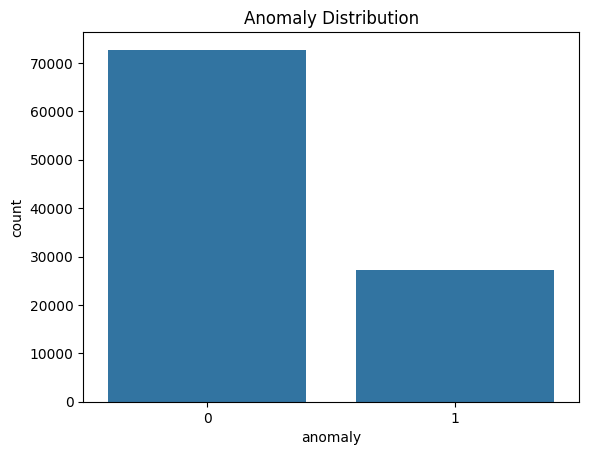


Preprocessing Completed. File Saved!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import entropy

# Mount Google Drive (if loading from drive)
# from google.colab import drive
# drive.mount('/content/drive')

# Load dataset
file_path = "/content/hydraulic_condition_monitoring.csv"  # Change path accordingly
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# General statistics
print("\nDataset Statistics:")
print(df.describe())

# Normalize time-series data
scaler = StandardScaler()  # Or use MinMaxScaler()
sensor_columns = ["PS1", "PS2", "PS3", "PS4", "PS5", "PS6", "EPS1", "FS1", "FS2", "TS1", "TS2", "TS3", "TS4", "VS1", "CE", "CP", "SE"]
df[sensor_columns] = scaler.fit_transform(df[sensor_columns])

# Feature Extraction (Mean, Variance, Entropy)
df["mean_pressure"] = df[["PS1", "PS2", "PS3", "PS4", "PS5", "PS6"]].mean(axis=1)
df["var_pressure"] = df[["PS1", "PS2", "PS3", "PS4", "PS5", "PS6"]].var(axis=1)
df["entropy_pressure"] = df[["PS1", "PS2", "PS3", "PS4", "PS5", "PS6"]].apply(lambda x: entropy(np.abs(x)), axis=1)

df["mean_temperature"] = df[["TS1", "TS2", "TS3", "TS4"]].mean(axis=1)
df["var_temperature"] = df[["TS1", "TS2", "TS3", "TS4"]].var(axis=1)

df["mean_vibration"] = df["VS1"]
df["var_vibration"] = df["VS1"].var()

# Label data: Normal (0) vs Anomalous (1)
df["anomaly"] = 0
df.loc[(df["Cooler_Condition"] == 3) |
       (df["Valve_Condition"] < 80) |
       (df["Pump_Leakage"] > 0) |
       (df["Accumulator_Pressure"] < 100), "anomaly"] = 1

# Check label distribution
print("\nAnomaly Class Distribution:")
print(df["anomaly"].value_counts())

# Plot anomaly distribution
sns.countplot(x=df["anomaly"])
plt.title("Anomaly Distribution")
plt.show()

# Save Preprocessed Dataset
df.to_csv("/content/hydraulic_condition_monitoring_preprocessed.csv", index=False)

print("\nPreprocessing Completed. File Saved!")


In [ ]:
print(df.isnull().sum())


PS1                     0
PS2                     0
PS3                     0
PS4                     0
PS5                     0
PS6                     0
EPS1                    0
FS1                     0
FS2                     0
TS1                     0
TS2                     0
TS3                     0
TS4                     0
VS1                     0
CE                      0
CP                      0
SE                      0
Cooler_Condition        0
Valve_Condition         0
Pump_Leakage            0
Accumulator_Pressure    0
Stable_Flag             0
mean_pressure           0
var_pressure            0
entropy_pressure        0
mean_temperature        0
var_temperature         0
mean_vibration          0
var_vibration           0
anomaly                 0
dtype: int64


In [ ]:
print(df.describe())  # Check min and max values


                PS1           PS2           PS3           PS4           PS5  \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean   6.430412e-18 -3.410605e-18  4.554579e-17  3.210943e-16 -1.960032e-16   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -1.733815e+00 -1.735324e+00 -1.734340e+00 -1.725462e+00 -1.726271e+00   
25%   -8.625369e-01 -8.662708e-01 -8.690604e-01 -8.677042e-01 -8.712712e-01   
50%   -3.876470e-03  2.332290e-03  5.730060e-03 -1.761638e-03 -5.331112e-04   
75%    8.676576e-01  8.658755e-01  8.675701e-01  8.651418e-01  8.690519e-01   
max    1.735676e+00  1.726263e+00  1.725859e+00  1.730093e+00  1.732613e+00   

                PS6          EPS1           FS1           FS2           TS1  \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean  -1.047340e-16 -2.622258e-16  2.744827e-16 -4.263256e-19 -1.594280e-16   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.

In [ ]:
print(df['anomaly'].value_counts())


anomaly
0    72743
1    27257
Name: count, dtype: int64


**Below is the OG code jo execute hogya tha aur accuracy 0.99 aya**

In [ ]:
# Install required libraries
# !pip install xgboost scikit-learn tensorflow

# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

# Load preprocessed dataset
df = pd.read_csv("/content/hydraulic_condition_monitoring_preprocessed.csv")

# Drop unnecessary columns (keeping only sensor data and anomaly labels)
sensor_cols = ["PS1", "PS2", "PS3", "FS1", "FS2", "TS1", "TS2", "TS3", "VS1"]
target_col = "anomaly"
X = df[sensor_cols]
y = df[target_col]

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 1. Train Individual Models ###

## (A) Autoencoder for Pressure & Flow Sensors ##
autoencoder = Sequential([
    Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(8, activation="relu"),
    Dense(16, activation="relu"),
    Dense(X_train.shape[1], activation="linear")
])

autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

## (B) LSTM for Pressure & Flow Sensors ##
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(30, return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

## (C) Isolation Forest for Temperature Sensors ##
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train)

## (D) One-Class SVM for Vibration Sensors ##
one_svm = OneClassSVM(kernel="rbf", nu=0.05)
one_svm.fit(X_train)

## (E) Random Forest for Combined Data ##
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

## (F) XGBoost for Combined Data ##
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

### 2. Train Fusion Model for Multimodal Detection ###

# Get predictions from individual models
autoencoder_pred = np.mean(np.abs(autoencoder.predict(X_test) - X_test), axis=1)
lstm_pred = lstm_model.predict(X_test_lstm).flatten()
iso_forest_pred = iso_forest.predict(X_test)
one_svm_pred = one_svm.predict(X_test)
rf_pred = rf_model.predict_proba(X_test)[:, 1]
xgb_pred = xgb_model.predict_proba(X_test)[:, 1]

# Convert Isolation Forest & One-Class SVM to anomaly scores
iso_forest_pred = np.where(iso_forest_pred == 1, 0, 1)  # Convert {1: normal, -1: anomaly} to {0, 1}
one_svm_pred = np.where(one_svm_pred == 1, 0, 1)  # Convert {1: normal, -1: anomaly} to {0, 1}

# Combine model outputs into a feature matrix
ensemble_features = np.column_stack([autoencoder_pred, lstm_pred, iso_forest_pred, one_svm_pred, rf_pred, xgb_pred])

# Train a meta-classifier (Fusion Model)
fusion_model = RandomForestClassifier(n_estimators=50, random_state=42)
fusion_model.fit(ensemble_features, y_test)

# Evaluate the fusion model
ensemble_test_pred = fusion_model.predict(ensemble_features)

from sklearn.metrics import accuracy_score, classification_report
print("Fusion Model Accuracy:", accuracy_score(y_test, ensemble_test_pred))
print("Classification Report:\n", classification_report(y_test, ensemble_test_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.0639 - val_loss: 0.0279
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0280 - val_loss: 0.0280
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0278 - val_loss: 0.0275
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0272 - val_loss: 0.0269
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0266 - val_loss: 0.0267
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0263 - val_loss: 0.0262
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0260 - val_loss: 0.0260
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0259 - val_loss: 0.0260
Epoch 9/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0258 - val_loss: 0.0261
Epoch 10/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0259 - val_loss: 0.0260
Epoch 11/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0256 - val_loss: 0.0260
Epoch 12/50
2500/2500 ━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.7275 - loss: 0.5895 - val_accuracy: 0.7287 - val_loss: 0.5850
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.7269 - loss: 0.5866 - val_accuracy: 0.7287 - val_loss: 0.5846
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.7268 - loss: 0.5867 - val_accuracy: 0.7287 - val_loss: 0.5845
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7282 - loss: 0.5853 - val_accuracy: 0.7287 - val_loss: 0.5847
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7303 - loss: 0.5832 - val_accuracy: 0.7287 - val_loss: 0.5846
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.7306 - loss: 0.5828 - val_accuracy: 0.7287 - val_loss: 0.5849
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.7260 - loss: 0.5873 - val_accuracy: 0.7287 - val_loss: 0.5845
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.7291 - loss: 0.58

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:15:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Fusion Model Accuracy: 0.9998
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14574
           1       1.00      1.00      1.00      5426

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



**Below is the code to save the models**

In [ ]:
# Install required libraries (Uncomment if needed)
# !pip install xgboost scikit-learn tensorflow joblib numpy pandas

# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import joblib

# Load dataset
df = pd.read_csv("/content/hydraulic_condition_monitoring_preprocessed.csv")

# Select sensor and target columns
sensor_cols = ["PS1", "PS2", "PS3", "FS1", "FS2", "TS1", "TS2", "TS3", "VS1"]
target_col = "anomaly"
X = df[sensor_cols]
y = df[target_col]

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train Models ###

# Autoencoder
autoencoder = Sequential([
    Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(8, activation="relu"),
    Dense(16, activation="relu"),
    Dense(X_train.shape[1], activation="linear")
])
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

# LSTM Model
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(30, return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train)

# One-Class SVM
one_svm = OneClassSVM(kernel="rbf", nu=0.05)
one_svm.fit(X_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

### Train Fusion Model ###
autoencoder_pred = np.mean(np.abs(autoencoder.predict(X_test) - X_test), axis=1)
lstm_pred = lstm_model.predict(X_test_lstm).flatten()
iso_forest_pred = np.where(iso_forest.predict(X_test) == 1, 0, 1)
one_svm_pred = np.where(one_svm.predict(X_test) == 1, 0, 1)
rf_pred = rf_model.predict_proba(X_test)[:, 1]
xgb_pred = xgb_model.predict_proba(X_test)[:, 1]

ensemble_features = np.column_stack([autoencoder_pred, lstm_pred, iso_forest_pred, one_svm_pred, rf_pred, xgb_pred])

fusion_model = RandomForestClassifier(n_estimators=50, random_state=42)
fusion_model.fit(ensemble_features, y_test)

# Evaluate Fusion Model
ensemble_test_pred = fusion_model.predict(ensemble_features)
from sklearn.metrics import accuracy_score, classification_report
print("Fusion Model Accuracy:", accuracy_score(y_test, ensemble_test_pred))
print("Classification Report:\n", classification_report(y_test, ensemble_test_pred))

### Save Models ###
autoencoder.save("autoencoder.h5")
lstm_model.save("lstm_model.h5")
joblib.dump(iso_forest, "isolation_forest.pkl")
joblib.dump(one_svm, "one_svm.pkl")
joblib.dump(rf_model, "random_forest.pkl")
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(fusion_model, "fusion_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("All models have been saved successfully!")
!ls -lh *.pkl *.h5  # List saved models


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0565 - val_loss: 0.0281
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0277 - val_loss: 0.0279
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0276 - val_loss: 0.0278
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0276 - val_loss: 0.0279
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0275 - val_loss: 0.0280
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0274 - val_loss: 0.0279
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0276 - val_loss: 0.0279
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0273 - val_loss: 0.0281
Epoch 9/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0275 - val_loss: 0.0278
Epoch 10/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0274 - val_loss: 0.0279
Epoch 11/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0273 - val_loss: 0.0279
Epoch 12/50
2500/2500 ━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7250 - loss: 0.5926 - val_accuracy: 0.7287 - val_loss: 0.5847
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7268 - loss: 0.5869 - val_accuracy: 0.7287 - val_loss: 0.5851
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7279 - loss: 0.5856 - val_accuracy: 0.7287 - val_loss: 0.5846
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7251 - loss: 0.5884 - val_accuracy: 0.7287 - val_loss: 0.5849
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7262 - loss: 0.5873 - val_accuracy: 0.7287 - val_loss: 0.5847
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7282 - loss: 0.5854 - val_accuracy: 0.7287 - val_loss: 0.5846
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7263 - loss: 0.5872 - val_accuracy: 0.7287 - val_loss: 0.5846
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7295 - loss: 0.5839 - val

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:57:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Fusion Model Accuracy: 0.9998
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14574
           1       1.00      1.00      1.00      5426

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

All models have been saved successfully!
-rw-r--r-- 1 root root  44K Mar  4 06:58 autoencoder.h5
-rw-r--r-- 1 root root  35M Mar  4 06:58 fusion_model.pkl
-rw-r--r-- 1 root root 1.9M Mar  4 06:58 isolation_forest.pkl
-rw-r--r-- 1 root root 284K Mar  4 06:58 lstm_model.h5
-rw-r--r-- 1 root root 365K Mar  4 06:58 one_svm.pkl
-rw-r--r-- 1 root root 200M Mar  4 06:58 random_forest.pkl
-rw-r--r-- 1 root root 1.4K Mar  4 06:58 scaler.pkl
-rw-r--r-- 1 root root 425K Mar  4 06:58 xgb_model.pkl


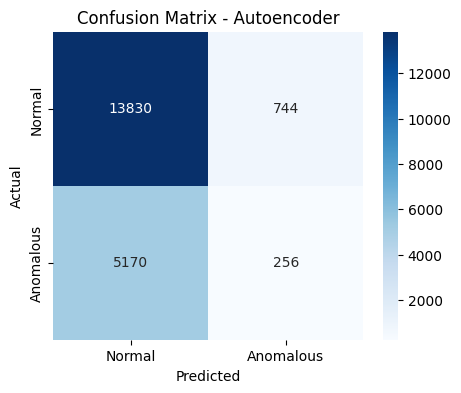

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


# Convert autoencoder predictions into binary labels using a threshold
threshold = np.percentile(autoencoder_pred, 95)  # Set threshold based on quantile
autoencoder_binary_pred = (autoencoder_pred > threshold).astype(int)

plot_confusion_matrix(y_test, autoencoder_binary_pred, "Autoencoder")


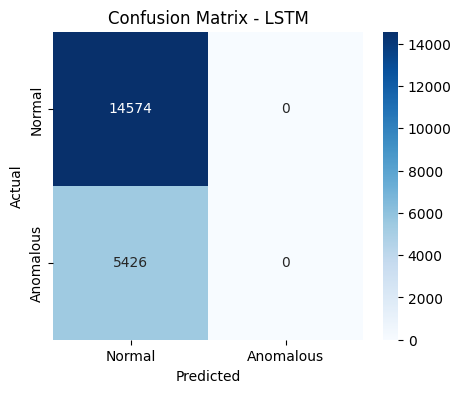

In [ ]:
lstm_binary_pred = (lstm_pred > 0.5).astype(int)
plot_confusion_matrix(y_test, lstm_binary_pred, "LSTM")


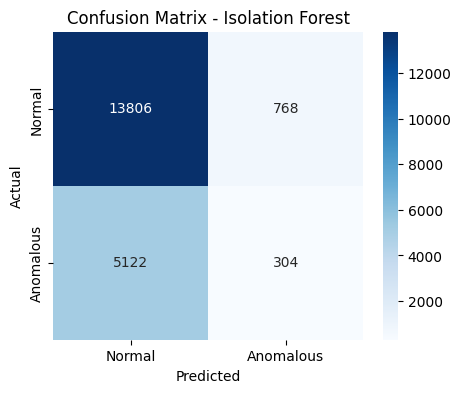

In [ ]:
plot_confusion_matrix(y_test, iso_forest_pred, "Isolation Forest")


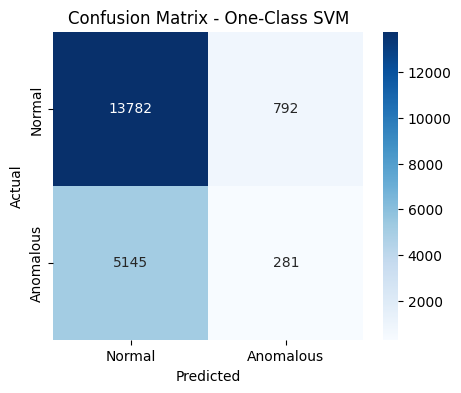

In [ ]:
plot_confusion_matrix(y_test, one_svm_pred, "One-Class SVM")


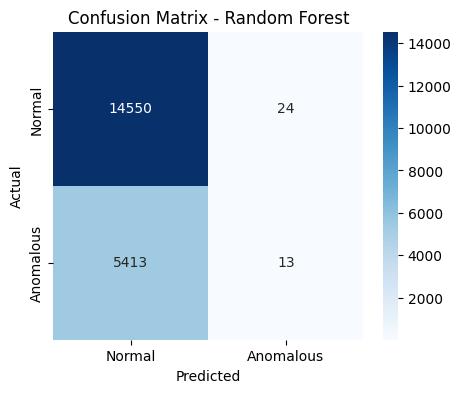

In [ ]:
rf_binary_pred = (rf_pred > 0.5).astype(int)
plot_confusion_matrix(y_test, rf_binary_pred, "Random Forest")


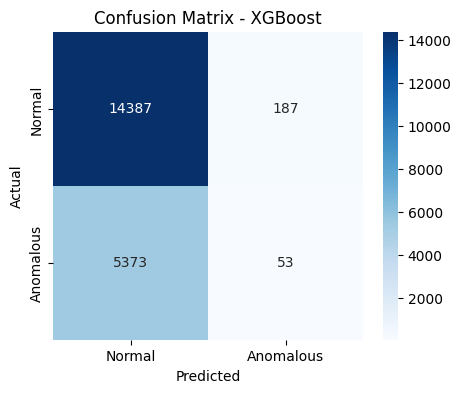

In [ ]:
xgb_binary_pred = (xgb_pred > 0.5).astype(int)
plot_confusion_matrix(y_test, xgb_binary_pred, "XGBoost")


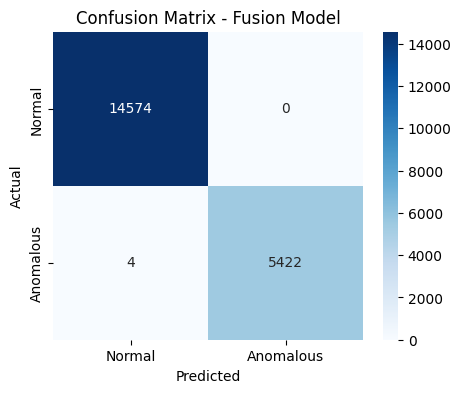

In [ ]:
plot_confusion_matrix(y_test, ensemble_test_pred, "Fusion Model")


<ipython-input-22-5f5a243ad382>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sensor_cols, y=rf_importance, palette="viridis")


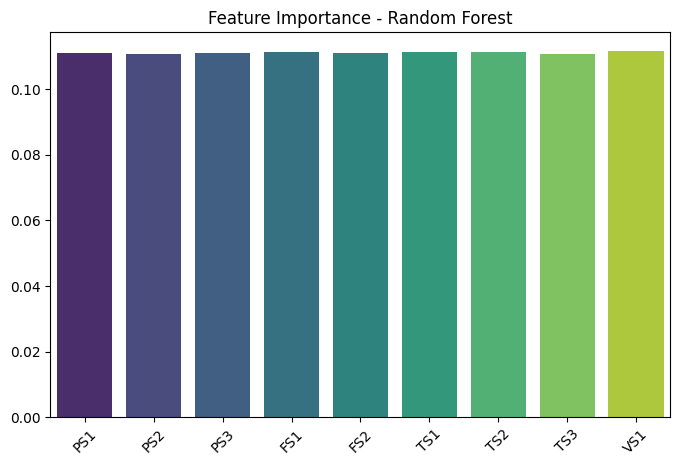

In [ ]:
rf_importance = rf_model.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=sensor_cols, y=rf_importance, palette="viridis")
plt.xticks(rotation=45)
plt.title("Feature Importance - Random Forest")
plt.show()


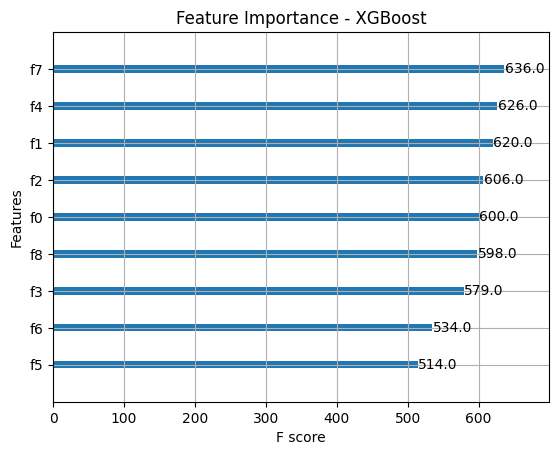

In [ ]:
xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=10)
plt.title("Feature Importance - XGBoost")
plt.show()


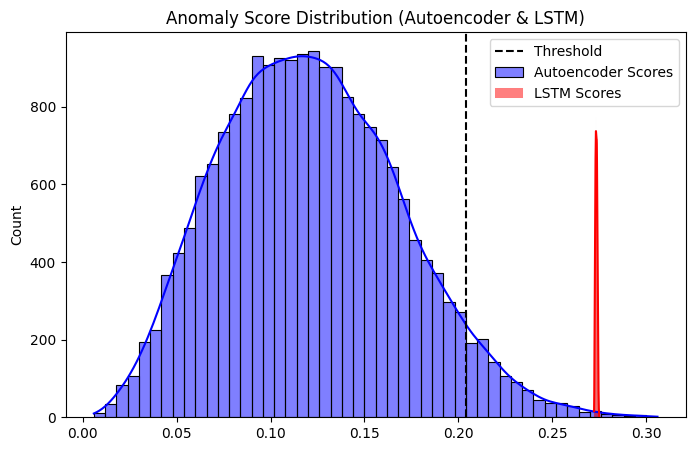

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(autoencoder_pred, bins=50, kde=True, color="blue", label="Autoencoder Scores")
sns.histplot(lstm_pred, bins=50, kde=True, color="red", label="LSTM Scores")
plt.axvline(threshold, color="black", linestyle="dashed", label="Threshold")
plt.legend()
plt.title("Anomaly Score Distribution (Autoencoder & LSTM)")
plt.show()


<ipython-input-25-89c5ae810da5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="pastel")


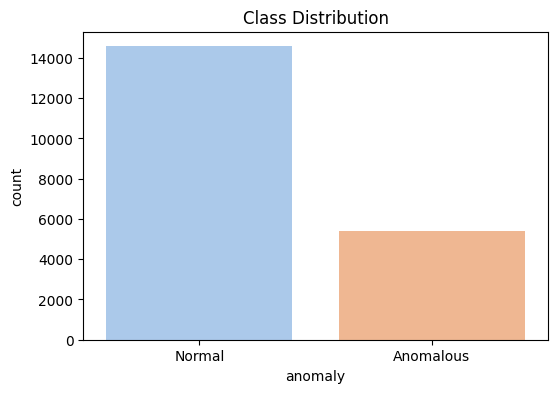

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_test, palette="pastel")
plt.xticks([0,1], ["Normal", "Anomalous"])
plt.title("Class Distribution")
plt.show()


In [ ]:
##Create supervised (for known failures) and unsupervised (for novel anomalies) detection components

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('/content/hydraulic_condition_monitoring_preprocessed.csv')

# Drop non-numeric columns for training
non_numeric_cols = ['Maintenance_Timestamp', 'Technician_Notes']
df = df.drop(columns=non_numeric_cols, errors='ignore')

# Handle missing values
df = df.fillna(df.median())

# Split features and labels
X = df.drop(columns=['anomaly'])
y = df['anomaly']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Supervised Learning: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Supervised Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Unsupervised Learning: Autoencoder for Anomaly Detection
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

# Calculate reconstruction loss for anomaly detection
reconstructed = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 95)

# Mark anomalies
anomalies = mse > threshold
print("Detected anomalies:", sum(anomalies))


Supervised Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14574
           1       1.00      1.00      1.00      5426

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.9509 - val_loss: 0.8508
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.8491 - val_loss: 0.8380
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.8366 - val_loss: 0.8278
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.8259 - val_loss: 0.8215
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.8205 - val_loss: 0.8157
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.8155 - val_loss: 0.8130
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.8121 - val_loss: 0.8083
Epoch 8/50
2500/2500 ━

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import pickle
import joblib

# Load dataset
df = pd.read_csv('/content/hydraulic_condition_monitoring_preprocessed.csv')

# Drop non-numeric columns for training
non_numeric_cols = ['Maintenance_Timestamp', 'Technician_Notes']
df = df.drop(columns=non_numeric_cols, errors='ignore')

# Handle missing values
df = df.fillna(df.median())

# Split features and labels
X = df.drop(columns=['anomaly'])
y = df['anomaly']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Supervised Learning: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Supervised Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

joblib.dump(rf, "randomforest_supervlg.pkl")


# Unsupervised Learning: Autoencoder for Anomaly Detection
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

# Save Autoencoder Model
autoencoder.save("autoencoder_model_unsupervlg.h5")



print("All models have been saved successfully!")
!ls -lh *.pkl *.h5  # List saved models


joblib.dump(scaler, "scaler2.pkl")

# Calculate reconstruction loss for anomaly detection
reconstructed = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 95)

# Mark anomalies
anomalies = mse > threshold
print("Detected anomalies:", sum(anomalies))


Supervised Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14574
           1       1.00      1.00      1.00      5426

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.9608 - val_loss: 0.8680
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8641 - val_loss: 0.8525
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8514 - val_loss: 0.8452
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8408 - val_loss: 0.8299
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8289 - val_loss: 0.8232
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8220 - val_loss: 0.8178
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8180 - val_loss: 0.8137
Epoch 8/50
2500/2500 ━━━━━

All models have been saved successfully!
-rw-r--r-- 1 root root  58K Mar  4 07:16 autoencoder_model_unsupervlg.h5
-rw-r--r-- 1 root root  44K Mar  4 06:58 autoencoder_pandf.h5
-rw-r--r-- 1 root root  35M Mar  4 06:58 fusion_model.pkl
-rw-r--r-- 1 root root 1.9M Mar  4 06:58 isolation_forest_temp.pkl
-rw-r--r-- 1 root root 284K Mar  4 06:58 lstm_model_pandf.h5
-rw-r--r-- 1 root root 365K Mar  4 06:58 one_svm_vib.pkl
-rw-r--r-- 1 root root 200M Mar  4 06:58 random_forest_combineddata.pkl
-rw-r--r-- 1 root root 4.4M Mar  4 07:12 randomforest_supervlg.pkl
-rw-r--r-- 1 root root 1.4K Mar  4 06:58 scaler.pkl
-rw-r--r-- 1 root root 425K Mar  4 06:58 xgb_model_combineddata.pkl
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step
Detected anomalies: 1000


In [ ]:
##since the accuracy came 1, now we are implementing another way

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel

# Load dataset
df = pd.read_csv('/content/hydraulic_condition_monitoring_with_logs.csv')

# Drop non-numeric columns for training
non_numeric_cols = ['Maintenance_Timestamp', 'Technician_Notes']
df = df.drop(columns=non_numeric_cols, errors='ignore')

# Handle missing values
df = df.fillna(df.median())

# Check class imbalance
print("Class Distribution:")
print(df['anomaly'].value_counts())

# Split features and labels
X = df.drop(columns=['anomaly'])
y = df['anomaly']

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using XGBoost
feature_selector = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
feature_selector.fit(X_scaled, y)
selector = SelectFromModel(feature_selector, prefit=True)
X_selected = selector.transform(X_scaled)

# Split data into training and testing (Less test data for better training)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)

# 🔹 Final Supervised Model: XGBoost (Stronger Regularization to Prevent Overfitting)
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=7,  # Reduced depth to prevent overfitting
    learning_rate=0.005,  # Lower learning rate for better generalization
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=20,  # Stronger L2 regularization to prevent overfitting
    reg_alpha=10,  # Stronger L1 regularization
    scale_pos_weight=y.value_counts()[0] / y.value_counts()[1],  # Balance classes
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("Supervised Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 🔹 Final Unsupervised Model: Isolation Forest (Better than Autoencoder)
isolation_forest = IsolationForest(n_estimators=300, contamination=0.05, random_state=42)
isolation_forest.fit(X_train)
anomaly_scores = isolation_forest.decision_function(X_test)
thresh = np.percentile(anomaly_scores, 5)  # Set threshold at 5% of lowest scores
anomalies = anomaly_scores < thresh

print("Detected anomalies:", sum(anomalies))

# 🔹 Check Training Accuracy (Detect Overfitting)
train_pred = xgb_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_pred))


Class Distribution:
anomaly
0    50080
1    49920
Name: count, dtype: int64
Supervised Model Accuracy: 0.4998
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      4970
           1       0.50      0.48      0.49      5030

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Detected anomalies: 500
Training Accuracy: 0.6359888888888889


Training Progress:   5%|▌         | 1/20 [00:47<15:03, 47.57s/batch]

Trained 10 trees...


Training Progress:  10%|█         | 2/20 [01:33<13:53, 46.31s/batch]

Trained 20 trees...


Training Progress:  15%|█▌        | 3/20 [02:14<12:33, 44.31s/batch]

Trained 30 trees...


Training Progress:  20%|██        | 4/20 [02:59<11:51, 44.45s/batch]

Trained 40 trees...


Training Progress:  25%|██▌       | 5/20 [03:45<11:16, 45.07s/batch]

Trained 50 trees...


Training Progress:  30%|███       | 6/20 [04:31<10:33, 45.27s/batch]

Trained 60 trees...


Training Progress:  35%|███▌      | 7/20 [05:17<09:52, 45.57s/batch]

Trained 70 trees...


Training Progress:  40%|████      | 8/20 [06:03<09:07, 45.66s/batch]

Trained 80 trees...


Training Progress:  45%|████▌     | 9/20 [06:51<08:31, 46.51s/batch]

Trained 90 trees...


Training Progress:  50%|█████     | 10/20 [07:41<07:54, 47.43s/batch]

Trained 100 trees...


Training Progress:  55%|█████▌    | 11/20 [08:29<07:08, 47.59s/batch]

Trained 110 trees...


Training Progress:  60%|██████    | 12/20 [09:15<06:18, 47.30s/batch]

Trained 120 trees...


Training Progress:  65%|██████▌   | 13/20 [10:01<05:27, 46.78s/batch]

Trained 130 trees...


Training Progress:  70%|███████   | 14/20 [10:47<04:38, 46.50s/batch]

Trained 140 trees...


Training Progress:  75%|███████▌  | 15/20 [11:33<03:52, 46.47s/batch]

Trained 150 trees...


Training Progress:  80%|████████  | 16/20 [12:23<03:09, 47.33s/batch]

Trained 160 trees...


Training Progress:  85%|████████▌ | 17/20 [13:07<02:19, 46.57s/batch]

Trained 170 trees...


Training Progress:  90%|█████████ | 18/20 [13:54<01:32, 46.50s/batch]

Trained 180 trees...


Training Progress:  95%|█████████▌| 19/20 [14:38<00:45, 45.90s/batch]

Trained 190 trees...


Training Progress: 100%|██████████| 20/20 [15:22<00:00, 46.10s/batch]

Trained 200 trees...



Final Evaluation:
Mean Absolute Error (MAE): 240.80 seconds
Root Mean Squared Error (RMSE): 317.53 seconds


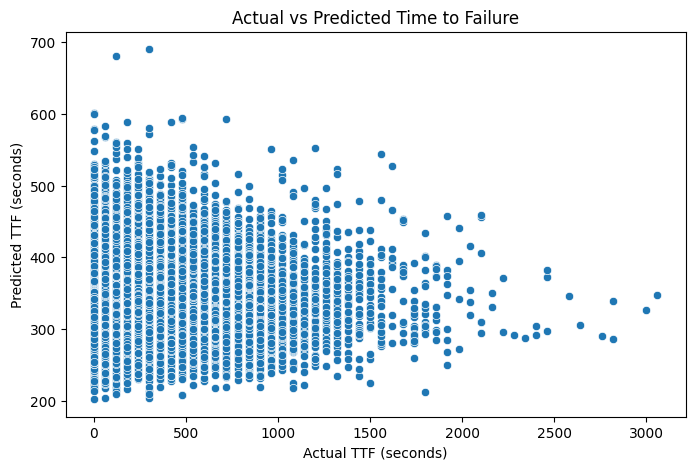

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('/content/hydraulic_condition_monitoring_with_timestamp.csv')

# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')

# Sort data by Timestamp
df = df.sort_values(by='Timestamp')

# Creating the Target Variable (Time to Failure - TTF)
df['Time_to_Failure'] = (df['Timestamp'].shift(-1) - df['Timestamp']).dt.total_seconds()

# Dropping last row as it has NaN in TTF (no next failure timestamp)
df = df[:-1]

# Selecting features (all sensor readings)
feature_columns = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'EPS1',
                   'FS1', 'FS2', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1',
                   'CE', 'CP', 'SE', 'Cooler_Condition', 'Valve_Condition',
                   'Pump_Leakage', 'Accumulator_Pressure', 'Stable_Flag',
                   ]

X = df[feature_columns]
y = df['Time_to_Failure']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Model with progress updates
n_estimators = 200  # Number of trees
rf = RandomForestRegressor(n_estimators=0, warm_start=True, random_state=42)

for i in tqdm(range(10, n_estimators + 1, 10), desc="Training Progress", unit="batch"):
    rf.n_estimators = i  # Incrementally add trees
    rf.fit(X_train, y_train)
    print(f"Trained {i} trees...")

# Making predictions
y_pred = rf.predict(X_test)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nFinal Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f} seconds")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} seconds")

# Plot Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual TTF (seconds)")
plt.ylabel("Predicted TTF (seconds)")
plt.title("Actual vs Predicted Time to Failure")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('/content/hydraulic_condition_monitoring_with_timestamp.csv')

# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')

# Sort data by Timestamp
df = df.sort_values(by='Timestamp')

# Creating the Target Variable (Time to Failure - TTF)
df['Time_to_Failure'] = (df['Timestamp'].shift(-1) - df['Timestamp']).dt.total_seconds()

# Dropping last row as it has NaN in TTF (no next failure timestamp)
df = df[:-1]

# Selecting features (all sensor readings)
feature_columns = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'EPS1',
                   'FS1', 'FS2', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1',
                   'CE', 'CP', 'SE', 'Cooler_Condition', 'Valve_Condition',
                   'Pump_Leakage', 'Accumulator_Pressure', 'Stable_Flag']

X = df[feature_columns]
y = df['Time_to_Failure']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Model with progress updates
n_estimators = 200  # Number of trees
rf2 = RandomForestRegressor(n_estimators=0, warm_start=True, random_state=42)

for i in tqdm(range(10, n_estimators + 1, 10), desc="Training Progress", unit="batch"):
    rf2.n_estimators = i  # Incrementally add trees
    rf2.fit(X_train, y_train)
    print(f"Trained {i} trees...")


joblib.dump(rf2, "random_forest_timestamp.pkl")

print("Model saved as 'randomforest_timestamp.pkl'")

# Making predictions
y_pred = rf2.predict(X_test)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nFinal Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f} seconds")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} seconds")

# Plot Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual TTF (seconds)")
plt.ylabel("Predicted TTF (seconds)")
plt.title("Actual vs Predicted Time to Failure")
plt.show()



print("Loaded model successfully!")


Training Progress:   5%|▌         | 1/20 [00:51<16:20, 51.59s/batch]

Trained 10 trees...


Training Progress:  10%|█         | 2/20 [01:41<15:12, 50.70s/batch]

Trained 20 trees...


Training Progress:  15%|█▌        | 3/20 [02:28<13:51, 48.94s/batch]

Trained 30 trees...


Training Progress:  20%|██        | 4/20 [03:18<13:09, 49.34s/batch]

Trained 40 trees...


Training Progress:  25%|██▌       | 5/20 [04:09<12:30, 50.03s/batch]

Trained 50 trees...


Training Progress:  30%|███       | 6/20 [04:59<11:40, 50.06s/batch]

Trained 60 trees...


Training Progress:  35%|███▌      | 7/20 [05:50<10:52, 50.21s/batch]

Trained 70 trees...


Training Progress:  40%|████      | 8/20 [06:39<09:59, 49.95s/batch]

Trained 80 trees...


Training Progress:  45%|████▌     | 9/20 [07:30<09:13, 50.29s/batch]

Trained 90 trees...


Training Progress:  50%|█████     | 10/20 [08:21<08:24, 50.46s/batch]

Trained 100 trees...


Training Progress:  55%|█████▌    | 11/20 [09:11<07:32, 50.26s/batch]

Trained 110 trees...


Training Progress:  60%|██████    | 12/20 [10:01<06:40, 50.11s/batch]

Trained 120 trees...


Training Progress:  65%|██████▌   | 13/20 [10:50<05:49, 49.87s/batch]

Trained 130 trees...


Training Progress:  70%|███████   | 14/20 [11:40<04:59, 49.87s/batch]

Trained 140 trees...


Training Progress:  75%|███████▌  | 15/20 [12:29<04:07, 49.51s/batch]

Trained 150 trees...


Training Progress:  80%|████████  | 16/20 [13:21<03:21, 50.32s/batch]

Trained 160 trees...


Training Progress:  85%|████████▌ | 17/20 [14:11<02:31, 50.35s/batch]

Trained 170 trees...


Training Progress:  90%|█████████ | 18/20 [15:02<01:40, 50.48s/batch]

Trained 180 trees...


Training Progress:  95%|█████████▌| 19/20 [15:51<00:50, 50.07s/batch]

Trained 190 trees...


**# again trying to train by reducing no of trees**

Training Progress:  10%|█         | 1/10 [00:36<05:30, 36.69s/batch]

Trained 10 trees...


Training Progress:  20%|██        | 2/10 [01:12<04:47, 35.97s/batch]

Trained 20 trees...


Training Progress:  30%|███       | 3/10 [01:44<04:01, 34.48s/batch]

Trained 30 trees...


Training Progress:  40%|████      | 4/10 [02:20<03:28, 34.79s/batch]

Trained 40 trees...


Training Progress:  50%|█████     | 5/10 [02:57<02:58, 35.68s/batch]

Trained 50 trees...


Training Progress:  60%|██████    | 6/10 [03:33<02:23, 35.79s/batch]

Trained 60 trees...


Training Progress:  70%|███████   | 7/10 [04:16<01:54, 38.07s/batch]

Trained 70 trees...


Training Progress:  80%|████████  | 8/10 [04:50<01:13, 36.95s/batch]

Trained 80 trees...


Training Progress:  90%|█████████ | 9/10 [05:27<00:37, 37.05s/batch]

Trained 90 trees...


Training Progress: 100%|██████████| 10/10 [06:04<00:00, 36.40s/batch]

Trained 100 trees...


Model saved as 'randomforest_timestamp.pkl'

Final Evaluation:
Mean Absolute Error (MAE): 241.53 seconds
Root Mean Squared Error (RMSE): 318.56 seconds


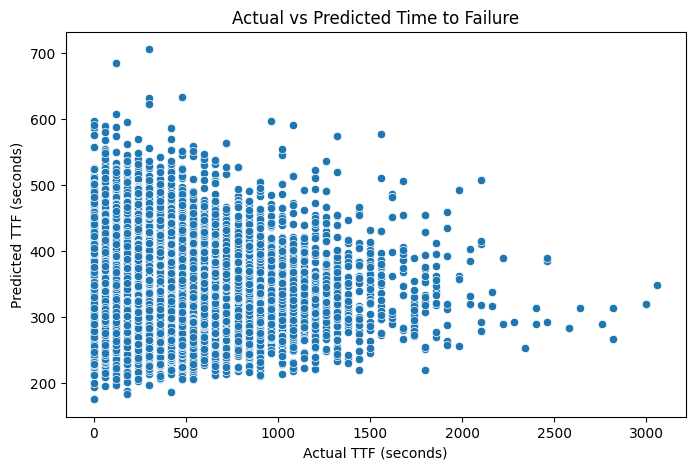

Loaded model successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('/content/hydraulic_condition_monitoring_with_timestamp.csv')

# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')

# Sort data by Timestamp
df = df.sort_values(by='Timestamp')

# Creating the Target Variable (Time to Failure - TTF)
df['Time_to_Failure'] = (df['Timestamp'].shift(-1) - df['Timestamp']).dt.total_seconds()

# Dropping last row as it has NaN in TTF (no next failure timestamp)
df = df[:-1]

# Selecting features (all sensor readings)
feature_columns = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'EPS1',
                   'FS1', 'FS2', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1',
                   'CE', 'CP', 'SE', 'Cooler_Condition', 'Valve_Condition',
                   'Pump_Leakage', 'Accumulator_Pressure', 'Stable_Flag']

X = df[feature_columns]
y = df['Time_to_Failure']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Model with progress updates
n_estimators = 100  # Number of trees
rf2 = RandomForestRegressor(n_estimators=0, warm_start=True, random_state=42)

for i in tqdm(range(10, n_estimators + 1, 10), desc="Training Progress", unit="batch"):
    rf2.n_estimators = i  # Incrementally add trees
    rf2.fit(X_train, y_train)
    print(f"Trained {i} trees...")


joblib.dump(rf2, "random_forest_timestamp.pkl")

print("Model saved as 'randomforest_timestamp.pkl'")

# Making predictions
y_pred = rf2.predict(X_test)

# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nFinal Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f} seconds")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} seconds")

# Plot Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual TTF (seconds)")
plt.ylabel("Predicted TTF (seconds)")
plt.title("Actual vs Predicted Time to Failure")
plt.show()



print("Loaded model successfully!")


**<!-- Dashboard -->**

**Dashbaord**

In [ ]:
!ls -lh *.pkl *.h5  # List saved models

-rw-r--r-- 1 root root  58K Mar  4 07:16 autoencoder_model_unsupervlg.h5
-rw-r--r-- 1 root root  44K Mar  4 06:58 autoencoder_pandf.h5
-rw-r--r-- 1 root root  35M Mar  4 06:58 fusion_model.pkl
-rw-r--r-- 1 root root 1.9M Mar  4 06:58 isolation_forest_temp.pkl
-rw-r--r-- 1 root root 284K Mar  4 06:58 lstm_model_pandf.h5
-rw-r--r-- 1 root root 365K Mar  4 06:58 one_svm_vib.pkl
-rw-r--r-- 1 root root 200M Mar  4 06:58 random_forest_combineddata.pkl
-rw-r--r-- 1 root root 4.4M Mar  4 07:12 randomforest_supervlg.pkl
-rw-r--r-- 1 root root 469M Mar  4 08:54 random_forest_timestamp.pkl
-rw-r--r-- 1 root root 2.0K Mar  4 07:16 scaler2.pkl
-rw-r--r-- 1 root root 1.4K Mar  4 06:58 scaler.pkl
-rw-r--r-- 1 root root 425K Mar  4 06:58 xgb_model_combineddata.pkl
